In [1]:
import os
from nltk.tree import Tree
from xml.etree import ElementTree as ET

From previous processing:

In [2]:
attributes = {
    ('Abstract', 'AbstractText'),
    ('Abstract', 'CopyrightInformation'),
    ('AbstractText', 'b'),
    ('AbstractText', 'i'),
    ('AbstractText', 'sub'),
    ('AbstractText', 'sup'),
    ('AbstractText', 'u'),
    ('AccessionNumberList', 'AccessionNumber'),
    ('AffiliationInfo', 'Affiliation'),
    ('Article', 'Abstract'),
    ('Article', 'ArticleDate'),
    ('Article', 'ArticleTitle'),
    ('Article', 'AuthorList'),
    ('Article', 'DataBankList'),
    ('Article', 'ELocationID'),
    ('Article', 'GrantList'),
    ('Article', 'Journal'),
    ('Article', 'Language'),
    ('Article', 'Pagination'),
    ('Article', 'PublicationTypeList'),
    ('Article', 'VernacularTitle'),
    ('ArticleDate', 'Day'),
    ('ArticleDate', 'Month'),
    ('ArticleDate', 'Year'),
    ('ArticleIdList', 'ArticleId'),
    ('ArticleTitle', 'b'),
    ('ArticleTitle', 'i'),
    ('ArticleTitle', 'sub'),
    ('ArticleTitle', 'sup'),
    ('Author', 'AffiliationInfo'),
    ('Author', 'CollectiveName'),
    ('Author', 'ForeName'),
    ('Author', 'Identifier'),
    ('Author', 'Initials'),
    ('Author', 'LastName'),
    ('Author', 'Suffix'),
    ('AuthorList', 'Author'),
    ('Chemical', 'NameOfSubstance'),
    ('Chemical', 'RegistryNumber'),
    ('ChemicalList', 'Chemical'),
    ('CommentsCorrections', 'Note'),
    ('CommentsCorrections', 'PMID'),
    ('CommentsCorrections', 'RefSource'),
    ('CommentsCorrectionsList', 'CommentsCorrections'),
    ('DataBank', 'AccessionNumberList'),
    ('DataBank', 'DataBankName'),
    ('DataBankList', 'DataBank'),
    ('DateCompleted', 'Day'),
    ('DateCompleted', 'Month'),
    ('DateCompleted', 'Year'),
    ('DateCreated', 'Day'),
    ('DateCreated', 'Month'),
    ('DateCreated', 'Year'),
    ('DateRevised', 'Day'),
    ('DateRevised', 'Month'),
    ('DateRevised', 'Year'),
    ('GeneSymbolList', 'GeneSymbol'),
    ('Grant', 'Acronym'),
    ('Grant', 'Agency'),
    ('Grant', 'Country'),
    ('Grant', 'GrantID'),
    ('GrantList', 'Grant'),
    ('History', 'PubMedPubDate'),
    ('Investigator', 'AffiliationInfo'),
    ('Investigator', 'ForeName'),
    ('Investigator', 'Initials'),
    ('Investigator', 'LastName'),
    ('Investigator', 'Suffix'),
    ('InvestigatorList', 'Investigator'),
    ('Journal', 'ISOAbbreviation'),
    ('Journal', 'ISSN'),
    ('Journal', 'JournalIssue'),
    ('Journal', 'Title'),
    ('JournalIssue', 'Issue'),
    ('JournalIssue', 'PubDate'),
    ('JournalIssue', 'Volume'),
    ('Keyword', 'i'),
    ('Keyword', 'sup'),
    ('KeywordList', 'Keyword'),
    ('MedlineCitation', 'Article'),
    ('MedlineCitation', 'ChemicalList'),
    ('MedlineCitation', 'CitationSubset'),
    ('MedlineCitation', 'CommentsCorrectionsList'),
    ('MedlineCitation', 'DateCompleted'),
    ('MedlineCitation', 'DateCreated'),
    ('MedlineCitation', 'DateRevised'),
    ('MedlineCitation', 'GeneSymbolList'),
    ('MedlineCitation', 'GeneralNote'),
    ('MedlineCitation', 'InvestigatorList'),
    ('MedlineCitation', 'KeywordList'),
    ('MedlineCitation', 'MedlineJournalInfo'),
    ('MedlineCitation', 'MeshHeadingList'),
    ('MedlineCitation', 'NumberOfReferences'),
    ('MedlineCitation', 'OtherAbstract'),
    ('MedlineCitation', 'OtherID'),
    ('MedlineCitation', 'PMID'),
    ('MedlineCitation', 'PersonalNameSubjectList'),
    ('MedlineCitation', 'SpaceFlightMission'),
    ('MedlineCitation', 'SupplMeshList'),
    ('MedlineJournalInfo', 'Country'),
    ('MedlineJournalInfo', 'ISSNLinking'),
    ('MedlineJournalInfo', 'MedlineTA'),
    ('MedlineJournalInfo', 'NlmUniqueID'),
    ('MeshHeading', 'DescriptorName'),
    ('MeshHeading', 'QualifierName'),
    ('MeshHeadingList', 'MeshHeading'),
    ('OtherAbstract', 'AbstractText'),
    ('Pagination', 'MedlinePgn'),
    ('PersonalNameSubject', 'ForeName'),
    ('PersonalNameSubject', 'Initials'),
    ('PersonalNameSubject', 'LastName'),
    ('PersonalNameSubject', 'Suffix'),
    ('PersonalNameSubjectList', 'PersonalNameSubject'),
    ('PubDate', 'Day'),
    ('PubDate', 'MedlineDate'),
    ('PubDate', 'Month'),
    ('PubDate', 'Season'),
    ('PubDate', 'Year'),
    ('PubMedPubDate', 'Day'),
    ('PubMedPubDate', 'Hour'),
    ('PubMedPubDate', 'Minute'),
    ('PubMedPubDate', 'Month'),
    ('PubMedPubDate', 'Year'),
    ('PublicationTypeList', 'PublicationType'),
    ('PubmedArticle', 'MedlineCitation'),
    ('PubmedArticle', 'PubmedData'),
    ('PubmedArticleSet', 'PubmedArticle'),
    ('PubmedData', 'ArticleIdList'),
    ('PubmedData', 'History'),
    ('PubmedData', 'PublicationStatus'),
    ('SupplMeshList', 'SupplMeshName'),
    ('VernacularTitle', 'i'),
    ('VernacularTitle', 'sub'),
    ('VernacularTitle', 'sup'),
    ('b', 'i'),
    ('b', 'sub'),
    ('b', 'sup'),
    ('b', 'u'),
    ('i', 'b'),
    ('i', 'i'),
    ('i', 'sub'),
    ('i', 'sup'),
    ('sub', 'b'),
    ('sub', 'i'),
    ('sub', 'sub'),
    ('sub', 'sup'),
    ('sup', 'b'),
    ('sup', 'i'),
    ('sup', 'sub'),
    ('sup', 'sup')
}

In [3]:
plot_attributes = {
    ('Abstract', 'AbstractText'),
    ('Abstract', 'CopyrightInformation'),
    ('AccessionNumberList', 'AccessionNumber'),
    ('AffiliationInfo', 'Affiliation'),
    ('Article', 'Abstract'),
    ('Article', 'ArticleDate'),
    ('Article', 'ArticleTitle'),
    ('Article', 'AuthorList'),
    ('Article', 'DataBankList'),
    ('Article', 'ELocationID'),
    ('Article', 'GrantList'),
    ('Article', 'Journal'),
    ('Article', 'Language'),
    ('Article', 'Pagination'),
    ('Article', 'PublicationTypeList'),
    ('Article', 'VernacularTitle'),
    ('ArticleDate', 'Day'),
    ('ArticleDate', 'Month'),
    ('ArticleDate', 'Year'),
    ('ArticleIdList', 'ArticleId'),
    ('Author', 'AffiliationInfo'),
    ('Author', 'CollectiveName'),
    ('Author', 'ForeName'),
    ('Author', 'Identifier'),
    ('Author', 'Initials'),
    ('Author', 'LastName'),
    ('Author', 'Suffix'),
    ('AuthorList', 'Author'),
    ('Chemical', 'NameOfSubstance'),
    ('Chemical', 'RegistryNumber'),
    ('ChemicalList', 'Chemical'),
    ('CommentsCorrections', 'Note'),
    ('CommentsCorrections', 'PMID'),
    ('CommentsCorrections', 'RefSource'),
    ('CommentsCorrectionsList', 'CommentsCorrections'),
    ('DataBank', 'AccessionNumberList'),
    ('DataBank', 'DataBankName'),
    ('DataBankList', 'DataBank'),
    ('DateCompleted', 'Day'),
    ('DateCompleted', 'Month'),
    ('DateCompleted', 'Year'),
    ('DateCreated', 'Day'),
    ('DateCreated', 'Month'),
    ('DateCreated', 'Year'),
    ('DateRevised', 'Day'),
    ('DateRevised', 'Month'),
    ('DateRevised', 'Year'),
    ('GeneSymbolList', 'GeneSymbol'),
    ('Grant', 'Acronym'),
    ('Grant', 'Agency'),
    ('Grant', 'Country'),
    ('Grant', 'GrantID'),
    ('GrantList', 'Grant'),
    ('History', 'PubMedPubDate'),
    ('Investigator', 'AffiliationInfo'),
    ('Investigator', 'ForeName'),
    ('Investigator', 'Initials'),
    ('Investigator', 'LastName'),
    ('Investigator', 'Suffix'),
    ('InvestigatorList', 'Investigator'),
    ('Journal', 'ISOAbbreviation'),
    ('Journal', 'ISSN'),
    ('Journal', 'JournalIssue'),
    ('Journal', 'Title'),
    ('JournalIssue', 'Issue'),
    ('JournalIssue', 'PubDate'),
    ('JournalIssue', 'Volume'),
    ('KeywordList', 'Keyword'),
    ('MedlineCitation', 'Article'),
    ('MedlineCitation', 'ChemicalList'),
    ('MedlineCitation', 'CitationSubset'),
    ('MedlineCitation', 'CommentsCorrectionsList'),
    ('MedlineCitation', 'DateCompleted'),
    ('MedlineCitation', 'DateCreated'),
    ('MedlineCitation', 'DateRevised'),
    ('MedlineCitation', 'GeneSymbolList'),
    ('MedlineCitation', 'GeneralNote'),
    ('MedlineCitation', 'InvestigatorList'),
    ('MedlineCitation', 'KeywordList'),
    ('MedlineCitation', 'MedlineJournalInfo'),
    ('MedlineCitation', 'MeshHeadingList'),
    ('MedlineCitation', 'NumberOfReferences'),
    ('MedlineCitation', 'OtherAbstract'),
    ('MedlineCitation', 'OtherID'),
    ('MedlineCitation', 'PMID'),
    ('MedlineCitation', 'PersonalNameSubjectList'),
    ('MedlineCitation', 'SpaceFlightMission'),
    ('MedlineCitation', 'SupplMeshList'),
    ('MedlineJournalInfo', 'Country'),
    ('MedlineJournalInfo', 'ISSNLinking'),
    ('MedlineJournalInfo', 'MedlineTA'),
    ('MedlineJournalInfo', 'NlmUniqueID'),
    ('MeshHeading', 'DescriptorName'),
    ('MeshHeading', 'QualifierName'),
    ('MeshHeadingList', 'MeshHeading'),
    ('OtherAbstract', 'AbstractText'),
    ('Pagination', 'MedlinePgn'),
    ('PersonalNameSubject', 'ForeName'),
    ('PersonalNameSubject', 'Initials'),
    ('PersonalNameSubject', 'LastName'),
    ('PersonalNameSubject', 'Suffix'),
    ('PersonalNameSubjectList', 'PersonalNameSubject'),
    ('PubDate', 'Day'),
    ('PubDate', 'MedlineDate'),
    ('PubDate', 'Month'),
    ('PubDate', 'Season'),
    ('PubDate', 'Year'),
    ('PubMedPubDate', 'Day'),
    ('PubMedPubDate', 'Hour'),
    ('PubMedPubDate', 'Minute'),
    ('PubMedPubDate', 'Month'),
    ('PubMedPubDate', 'Year'),
    ('PublicationTypeList', 'PublicationType'),
    ('PubmedArticle', 'MedlineCitation'),
    ('PubmedArticle', 'PubmedData'),
    ('PubmedArticleSet', 'PubmedArticle'),
    ('PubmedData', 'ArticleIdList'),
    ('PubmedData', 'History'),
    ('PubmedData', 'PublicationStatus'),
    ('SupplMeshList', 'SupplMeshName'),
}

In [4]:
plot_tree = \
    Tree('PubmedArticleSet', [
        Tree('PubmedArticle', [
            Tree('MedlineCitation', [
                Tree('Article', [
                    Tree('Abstract', [
                        Tree('AbstractText', []),
                        Tree('CopyrightInformation', []),
                    ]),
                    Tree('ArticleDate', [
                        Tree('Day', []),
                        Tree('Month', []),
                        Tree('Year', []),
                    ]),
                    Tree('ArticleTitle', []),
                    Tree('AuthorList', [
                        Tree('Author', [
                            Tree('AffiliationInfo', [
                                Tree('Affiliation', []),
                            ]),
                            Tree('CollectiveName', []),
                            Tree('ForeName', []),
                            Tree('Identifier', []),
                            Tree('Initials', []),
                            Tree('LastName', []),
                            Tree('Suffix', []),
                        ]),
                    ]),
                    Tree('DataBankList', [
                        Tree('DataBank', [
                            Tree('AccessionNumberList', [
                                Tree('AccessionNumber', []),
                            ]),
                            Tree('DataBankName', []),
                        ]),
                    ]),
                    Tree('ELocationID', []),
                    Tree('GrantList', [
                        Tree('Grant', [
                            Tree('Acronym', []),
                            Tree('Agency', []),
                            Tree('Country', []),
                            Tree('GrantID', []),
                        ]),
                    ]),
                    Tree('Journal', [
                        Tree('ISOAbbreviation', []),
                        Tree('ISSN', []),
                        Tree('JournalIssue', [
                            Tree('Issue', []),
                            Tree('PubDate', [
                                Tree('Day', []),
                                Tree('MedlineDate', []),
                                Tree('Month', []),
                                Tree('Season', []),
                                Tree('Year', []),
                            ]),
                            Tree('Volume', []),
                        ]),
                        Tree('Title', []),
                    ]),
                    Tree('Language', []),
                    Tree('Pagination', [
                        Tree('MedlinePgn', []),
                    ]),
                    Tree('PublicationTypeList', [
                        Tree('PublicationType', []),
                    ]),
                    Tree('VernacularTitle', []),
                ]),
                Tree('ChemicalList', [
                    Tree('Chemical', [
                        Tree('NameOfSubstance', []),
                        Tree('RegistryNumber', []),
                    ]),
                ]),
                Tree('CitationSubset', []),
                Tree('CommentsCorrectionsList', [
                    Tree('CommentsCorrections', [
                        Tree('Note', []),
                        Tree('PMID', []),
                        Tree('RefSource', []),
                    ]),
                ]),
                Tree('DateCompleted', [
                    Tree('Day', []),
                    Tree('Month', []),
                    Tree('Year', []),
                ]),
                Tree('DateCreated', [
                    Tree('Day', []),
                    Tree('Month', []),
                    Tree('Year', []),
                ]),
                Tree('DateRevised', [
                    Tree('Day', []),
                    Tree('Month', []),
                    Tree('Year', []),
                ]),
                Tree('GeneSymbolList', [
                    Tree('GeneSymbol', []),
                ]),
                Tree('GeneralNote', []),
                Tree('InvestigatorList', [
                    Tree('Investigator', [
                        Tree('AffiliationInfo', [
                            Tree('Affiliation', []),
                        ]),
                        Tree('ForeName', []),
                        Tree('Initials', []),
                        Tree('LastName', []),
                        Tree('Suffix', []),
                    ]),
                ]),
                Tree('KeywordList', [
                    Tree('Keyword', []),
                ]),
                Tree('MedlineJournalInfo', [
                    Tree('Country', []),
                    Tree('ISSNLinking', []),
                    Tree('MedlineTA', []),
                    Tree('NlmUniqueID', []),
                ]),
                Tree('MeshHeadingList', [
                    Tree('MeshHeading', [
                        Tree('DescriptorName', []),
                        Tree('QualifierName', []),
                    ]),
                ]),
                Tree('NumberOfReferences', []),
                Tree('OtherAbstract', [
                    Tree('AbstractText', []),
                ]),
                Tree('OtherID', []),
                Tree('PMID', []),
                Tree('PersonalNameSubjectList', [
                    Tree('PersonalNameSubject', [
                        Tree('ForeName', []),
                        Tree('Initials', []),
                        Tree('LastName', []),
                        Tree('Suffix', []),
                    ]),
                ]),
                Tree('SpaceFlightMission', []),
                Tree('SupplMeshList', [
                    Tree('SupplMeshName', []),
                ]),
            ]),
            Tree('PubmedData', [
                Tree('ArticleIdList', [
                    Tree('ArticleId', []),
                ]),
                Tree('History', [
                    Tree('PubMedPubDate', [
                        Tree('Day', []),
                        Tree('Hour', []),
                        Tree('Minute', []),
                        Tree('Month', []),
                        Tree('Year', []),
                    ]),
                ]),
                Tree('PublicationStatus', []),
            ]),
        ])
    ]
)

In [5]:
plot_formated_tree = \
    Tree('      PubmedArticleSet      ', [
        Tree('      PubmedArticle      ', [
            Tree('      MedlineCitation      ', [
                Tree('      Article      ', [
                    Tree('      Abstract      ', [
                        Tree('      AbstractText      ', []),
                        Tree('      CopyrightInformation      ', []),
                    ]),
                    Tree('      ArticleDate      ', [
                        Tree('      Day      ', []),
                        Tree('      Month      ', []),
                        Tree('      Year      ', []),
                    ]),
                    Tree('      ArticleTitle      ', []),
                    Tree('      AuthorList      ', [
                        Tree('      Author      ', [
                            Tree('      AffiliationInfo      ', [
                                Tree('      Affiliation      ', []),
                            ]),
                            Tree('      CollectiveName      ', []),
                            Tree('      ForeName      ', []),
                            Tree('      Identifier      ', []),
                            Tree('      Initials      ', []),
                            Tree('      LastName      ', []),
                            Tree('      Suffix      ', []),
                        ]),
                    ]),
                    Tree('      DataBankList      ', [
                        Tree('      DataBank      ', [
                            Tree('      AccessionNumberList      ', [
                                Tree('      AccessionNumber      ', []),
                            ]),
                            Tree('      DataBankName      ', []),
                        ]),
                    ]),
                    Tree('      ELocationID      ', []),
                    Tree('      GrantList      ', [
                        Tree('      Grant      ', [
                            Tree('      Acronym      ', []),
                            Tree('      Agency      ', []),
                            Tree('      Country      ', []),
                            Tree('      GrantID      ', []),
                        ]),
                    ]),
                    Tree('      Journal      ', [
                        Tree('      ISOAbbreviation      ', []),
                        Tree('      ISSN      ', []),
                        Tree('      JournalIssue      ', [
                            Tree('      Issue      ', []),
                            Tree('      PubDate      ', [
                                Tree('      Day      ', []),
                                Tree('      MedlineDate      ', []),
                                Tree('      Month      ', []),
                                Tree('      Season      ', []),
                                Tree('      Year      ', []),
                            ]),
                            Tree('      Volume      ', []),
                        ]),
                        Tree('      Title      ', []),
                    ]),
                    Tree('      Language      ', []),
                    Tree('      Pagination      ', [
                        Tree('      MedlinePgn      ', []),
                    ]),
                    Tree('      PublicationTypeList      ', [
                        Tree('      PublicationType      ', []),
                    ]),
                    Tree('      VernacularTitle      ', []),
                ]),
                Tree('      ChemicalList      ', [
                    Tree('      Chemical      ', [
                        Tree('      NameOfSubstance      ', []),
                        Tree('      RegistryNumber      ', []),
                    ]),
                ]),
                Tree('      CitationSubset      ', []),
                Tree('      CommentsCorrectionsList      ', [
                    Tree('      CommentsCorrections      ', [
                        Tree('      Note      ', []),
                        Tree('      PMID      ', []),
                        Tree('      RefSource      ', []),
                    ]),
                ]),
                Tree('      DateCompleted      ', [
                    Tree('      Day      ', []),
                    Tree('      Month      ', []),
                    Tree('      Year      ', []),
                ]),
                Tree('      DateCreated      ', [
                    Tree('      Day      ', []),
                    Tree('      Month      ', []),
                    Tree('      Year      ', []),
                ]),
                Tree('      DateRevised      ', [
                    Tree('      Day      ', []),
                    Tree('      Month      ', []),
                    Tree('      Year      ', []),
                ]),
                Tree('      GeneSymbolList      ', [
                    Tree('      GeneSymbol      ', []),
                ]),
                Tree('      GeneralNote      ', []),
                Tree('      InvestigatorList      ', [
                    Tree('      Investigator      ', [
                        Tree('      AffiliationInfo      ', [
                            Tree('      Affiliation      ', []),
                        ]),
                        Tree('      ForeName      ', []),
                        Tree('      Initials      ', []),
                        Tree('      LastName      ', []),
                        Tree('      Suffix      ', []),
                    ]),
                ]),
                Tree('      KeywordList      ', [
                    Tree('      Keyword      ', []),
                ]),
                Tree('      MedlineJournalInfo      ', [
                    Tree('      Country      ', []),
                    Tree('      ISSNLinking      ', []),
                    Tree('      MedlineTA      ', []),
                    Tree('      NlmUniqueID      ', []),
                ]),
                Tree('      MeshHeadingList      ', [
                    Tree('      MeshHeading      ', [
                        Tree('      DescriptorName      ', []),
                        Tree('      QualifierName      ', []),
                    ]),
                ]),
                Tree('      NumberOfReferences      ', []),
                Tree('      OtherAbstract      ', [
                    Tree('      AbstractText      ', []),
                ]),
                Tree('      OtherID      ', []),
                Tree('      PMID      ', []),
                Tree('      PersonalNameSubjectList      ', [
                    Tree('      PersonalNameSubject      ', [
                        Tree('      ForeName      ', []),
                        Tree('      Initials      ', []),
                        Tree('      LastName      ', []),
                        Tree('      Suffix      ', []),
                    ]),
                ]),
                Tree('      SpaceFlightMission      ', []),
                Tree('      SupplMeshList      ', [
                    Tree('      SupplMeshName      ', []),
                ]),
            ]),
            Tree('      PubmedData      ', [
                Tree('      ArticleIdList      ', [
                    Tree('      ArticleId      ', []),
                ]),
                Tree('      History      ', [
                    Tree('      PubMedPubDate      ', [
                        Tree('      Day      ', []),
                        Tree('      Hour      ', []),
                        Tree('      Minute      ', []),
                        Tree('      Month      ', []),
                        Tree('      Year      ', []),
                    ]),
                ]),
                Tree('      PublicationStatus      ', []),
            ]),
        ])
    ]
)

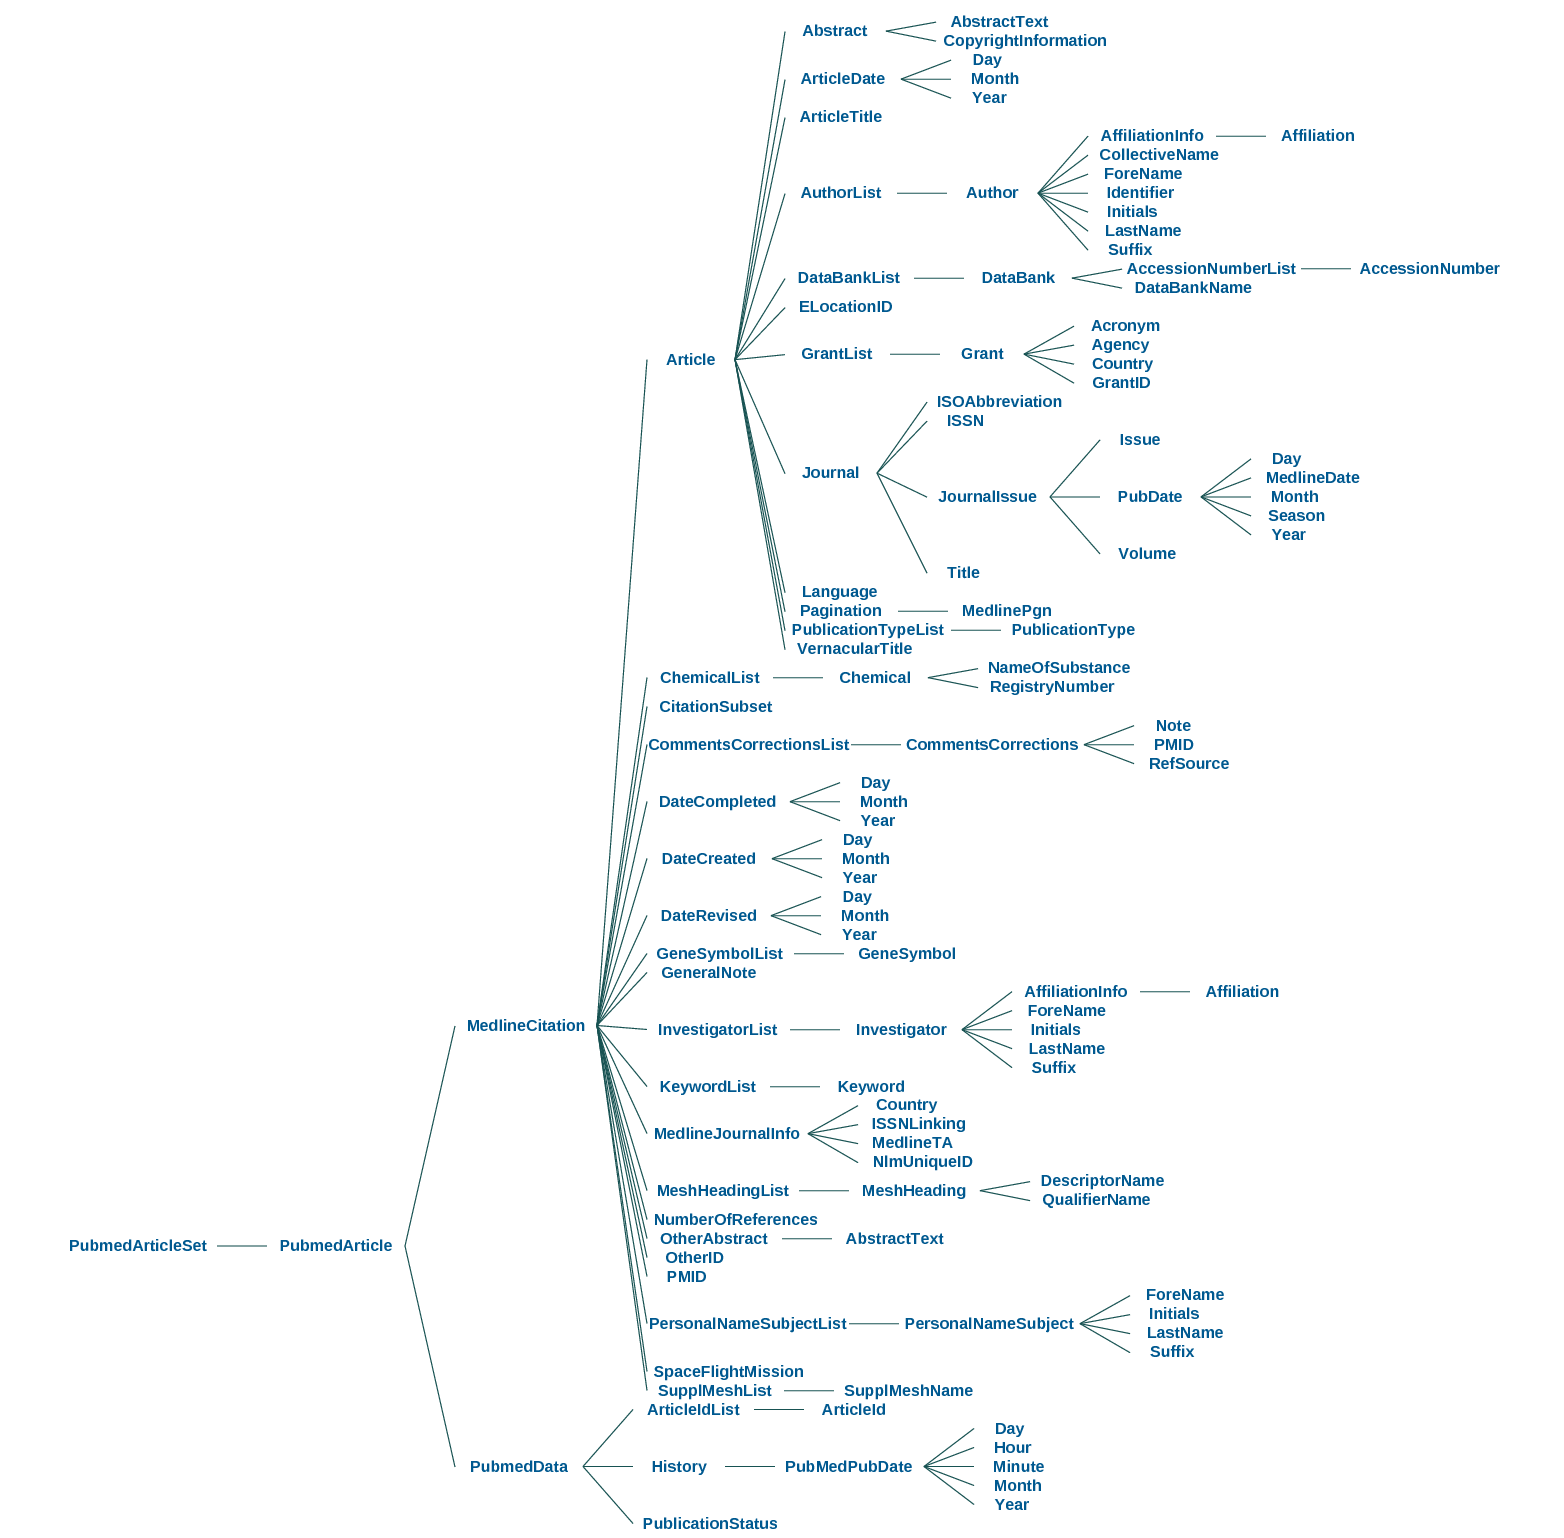

In [6]:
import os
from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame

cf = CanvasFrame()
tc = TreeWidget(cf.canvas(), plot_formated_tree, xspace=50, yspace=5, orientation='horizontal')
tc['node_font'] = 'arial 16 bold'
tc['leaf_font'] = 'arial 16 bold'
tc['node_color'] = '#005990'
tc['leaf_color'] = '#3F8F57'
tc['line_color'] = '#175252'
cf.add_widget(tc, 10, 10)
# cf.destroy()
cf.print_to_file('data/img/attr_tree.ps')
os.system('convert data/img/attr_tree.ps data/img/attr_tree.png')
display(Image(filename='data/img/attr_tree.png'))
# os.system('rm data/img/attr_tree.ps data/img/attr_tree.png')